# Notebook d'Analyse des données d'UCAD

**Contexte**

Notre étude porte sur :

#### *l’analyse de l'impact des dernières réformes du baccalauréat au Sénégal sur le taux de réussite au Bac et l’insertion universitaire*.

Ce notebook ce base sur la deuxieme partie de notre étude, à savoire *L'impact des réformes sur l’insertion universitaire notament à l'UCAD*

**Plan**

- Exploration et préparation des données
- Visualisation 

### Importation des packages nécessaires

In [24]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings from sklearn

In [25]:
import pandas as pd # pour la manipulation de données
import numpy as np 
import os # pour la manipulation de données
from tqdm import tqdm # Affichage de barres de progression

from matplotlib import pyplot as plt # pour les graphiques
import seaborn as sns # pour les graphiques

### Importation des données 

In [26]:
data = pd.read_csv("df_inscrit_resultat.csv") # Chargement des données
print("✅ Chargement des données réussi !")

✅ Chargement des données réussi !


## Néttoyage et Préparation des données

In [27]:
print("Informations générales sur le dataframe :")
print("------------------------------")
data.info() # Afficher les informations sur le dataframe

Informations générales sur le dataframe :
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215837 entries, 0 to 1215836
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   NUMERO                 1215837 non-null  object 
 1   SEXE                   1215837 non-null  object 
 2   ANNEE_BACC             1210891 non-null  float64
 3   NATIONALITE            1215837 non-null  object 
 4   SERIE_BACC             1183525 non-null  object 
 5   ETABLISSMENT_CODE      1215837 non-null  object 
 6   NIVEAU_SECTION         1215837 non-null  object 
 7   ANNEE_INSCRIPTION      1215837 non-null  int64  
 8   ANNEE UNIVERSITAIRE    1215837 non-null  object 
 9   TYPE_FORMATION         1215837 non-null  object 
 10  CODE_NIVEAU            1215837 non-null  int64  
 11  NIVEAU LMD ET NON LMD  1215837 non-null  object 
 12  SYSTEME                1215837 non-null  object 
 13 

In [28]:
# Filtrer les personnes de nationalité "Sénégalaise"
data_senegalais = data[data['NATIONALITE'].str.lower() == 'sénégalaise']
print(f"✅ Nombre d'inscrits de nationalité sénégalaise : {len(data_senegalais)}")

✅ Nombre d'inscrits de nationalité sénégalaise : 1157169


### Afficher les valeurs uniques présentes dans la colonne 'SERIE_BACC'

In [29]:
valeurs_possibles_serie_bac = data_senegalais['SERIE_BACC'].unique()
print("Valeurs possibles dans SERIE_BACC :")
print("------------------------------")
print(valeurs_possibles_serie_bac)

Valeurs possibles dans SERIE_BACC :
------------------------------
[nan 'D' 'L2' 'S2' 'A3' "L'1" 'S4' 'G' 'C' 'S' 'S1' 'SNB' "L'" 'A' 'B'
 'T1' 'E' 'S3' 'BT' 'A2' 'a3' 'A4' 'S5' 'SM' 'G2' 'T2' 'SB' 'F7' 'L1A'
 'LAR' 'SNA' 'LA' 'L1B' 'S2A' 'F6' 'ES' 'S1A' 'STEG' 'L' 'T' 'CAEP'
 'STIDD']


In [30]:
# Remplacement des valeurs dans la colonne 'mention'
data_senegalais['SERIE_BACC'] = (
    data_senegalais['SERIE_BACC']
    .replace({"L'": "L'1", 'G2': 'G'})
)

In [31]:
# Afficher les lignes où 'SERIE_BACC' est égal à "L'"
# l_prime_rows = data_senegalais[data_senegalais['SERIE_BACC'] == "G2"]
# l_prime_rows

### Afficher les valeurs uniques présentes dans la colonne 'NIVEAU LMD ET NON LMD'

In [32]:
valeurs_possibles_niveau = data['NIVEAU LMD ET NON LMD'].unique()
print("Valeurs possibles dans NIVEAU LMD ET NON LMD :")
print("------------------------------")
print(valeurs_possibles_niveau)

Valeurs possibles dans NIVEAU LMD ET NON LMD :
------------------------------
['3A' '8A' 'M2' 'M1' '2A' 'D' 'L3' 'L1' '6A' '5A' '9A' '4A' 'L2' '1A' '0A'
 '7A' '11A' '12A' '10A' 'Doctorat' 'Master' 'M5' 'M6']


### Filtrage du DataFrame : 

 - **Série au bac :** LA, LAR, S1A, S2A, STEG, G
 - **Niveau :** L1, L2, L3, 1A, 2A, 3A

In [33]:
series_cibles = ["L'1", 'LA','LAR', 'S1', 'S2', 'S1A', 'S2A', 'STEG', 'G'] # Séries cibles pour le baccalauréat
niveaux_cibles = ['L1', 'L2', 'L3', '1A', '2A', '3A'] # Niveaux cibles pour le LMD et non LMD

df_filtre = data_senegalais[
    (data_senegalais['SERIE_BACC'].isin(series_cibles)) & # Filtrer par séries cibles
    (data_senegalais['NIVEAU LMD ET NON LMD'].isin(niveaux_cibles)) # Filtrer par niveaux cibles
]
print("✅ Filtrage des données réussi !")
print("-------------------------------")
print("Informations sur le dataframe filtré :")
print("-------------------------------")
df_filtre.info()

✅ Filtrage des données réussi !
-------------------------------
Informations sur le dataframe filtré :
-------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 579061 entries, 7 to 1215834
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   NUMERO                 579061 non-null  object 
 1   SEXE                   579061 non-null  object 
 2   ANNEE_BACC             579039 non-null  float64
 3   NATIONALITE            579061 non-null  object 
 4   SERIE_BACC             579061 non-null  object 
 5   ETABLISSMENT_CODE      579061 non-null  object 
 6   NIVEAU_SECTION         579061 non-null  object 
 7   ANNEE_INSCRIPTION      579061 non-null  int64  
 8   ANNEE UNIVERSITAIRE    579061 non-null  object 
 9   TYPE_FORMATION         579061 non-null  object 
 10  CODE_NIVEAU            579061 non-null  int64  
 11  NIVEAU LMD ET NON LMD  579061 non-null  object 
 12  SYSTEME    

In [34]:
# Afficher les lignes où la colonne 'ANNEE_BACC' est vide (NaN)
lignes_vide_annee_bac = df_filtre[df_filtre['ANNEE_BACC'].isna()]
print(f"Nombre de lignes avec ANNEE_BACC vide : {len(lignes_vide_annee_bac)}")
lignes_vide_annee_bac

Nombre de lignes avec ANNEE_BACC vide : 22


,NUMERO,SEXE,ANNEE_BACC,NATIONALITE,SERIE_BACC,ETABLISSMENT_CODE,NIVEAU_SECTION,ANNEE_INSCRIPTION,ANNEE UNIVERSITAIRE,TYPE_FORMATION,CODE_NIVEAU,NIVEAU LMD ET NON LMD,SYSTEME,DEPARTEMENT FORMATION,RESULTAT
246,200702USD,F,NaN,Sénégalaise,S2,FASEG,Licence Professionnelle Science de Gestion,2011,2010-2011,C,3,L3,LMD,Institut de Formation en Administration et Cré...,NaN
3059,201004B58,F,NaN,Sénégalaise,L'1,FASEG,Première Année du Diplôme Universitaire en Ges...,2011,2010-2011,C,1,1A,Classique,Institut de Formation en Administration et Cré...,NaN
3965,201004FLK,F,NaN,Sénégalaise,S2,FASEG,Première Année du Diplôme Universitaire en Ges...,2011,2010-2011,C,1,1A,Classique,Institut de Formation en Administration et Cré...,NaN
10395,199900PJB,M,NaN,Sénégalaise,L'1,FLSH,Licence d'Anglais,2011,2010-2011,I,3,3A,Classique,Anglais,NaN
11196,2010049S8,F,NaN,Sénégalaise,L'1,FLSH,Licence 1 Arabe,2011,2010-2011,I,1,L1,LMD,Arabe,NaN
20673,201004C9V,F,NaN,Sénégalaise,L'1,FASEG,Licence Professionnelle (CREFDES) option Banqu...,2011,2010-2011,C,3,L3,LMD,Centre de Recherche et de Formation pour le Dé...,NaN
21760,201004F8K,M,NaN,Sénégalaise,S2,FASEG,Licence en Management des Etablissements de la...,2011,2010-2011,I,3,3A,Classique,Gestion,NaN
32373,201004G28,F,NaN,Sénégalaise,L'1,FSJP,Licence 2 Sciences Juridiques(FAD),2011,2010-2011,I,2,L2,LMD,Institut des Métiers du Droit,NaN
35744,200803E6Y,F,NaN,Sénégalaise,L'1,FASEG,Licence 3 Professionnelle (CREFDES) option Ban...,2011,2010-2011,C,3,L3,LMD,Centre de Recherche et de Formation pour le Dé...,NaN
37593,2010048HI,M,NaN,Sénégalaise,L'1,FASEG,Licence 1 professionnelle option Banques et In...,2011,2010-2011,C,1,L1,LMD,Institut de Formation en Administration et Cré...,NaN


In [35]:
df_filtre = df_filtre[df_filtre['ANNEE_BACC'].notna()]
print(f"✅ Lignes avec ANNEE_BACC vide supprimées. Nouveau shape : {df_filtre.shape}")

✅ Lignes avec ANNEE_BACC vide supprimées. Nouveau shape : (579039, 15)


In [36]:
print("Informations sur le dataframe filtré :")
print("-------------------------------")
df_filtre.info()

Informations sur le dataframe filtré :
-------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 579039 entries, 7 to 1215834
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   NUMERO                 579039 non-null  object 
 1   SEXE                   579039 non-null  object 
 2   ANNEE_BACC             579039 non-null  float64
 3   NATIONALITE            579039 non-null  object 
 4   SERIE_BACC             579039 non-null  object 
 5   ETABLISSMENT_CODE      579039 non-null  object 
 6   NIVEAU_SECTION         579039 non-null  object 
 7   ANNEE_INSCRIPTION      579039 non-null  int64  
 8   ANNEE UNIVERSITAIRE    579039 non-null  object 
 9   TYPE_FORMATION         579039 non-null  object 
 10  CODE_NIVEAU            579039 non-null  int64  
 11  NIVEAU LMD ET NON LMD  579039 non-null  object 
 12  SYSTEME                579039 non-null  object 
 13  DEPARTEMENT FORMATION 

## Analyse exploratoire des données (EDA)

### Visualisation des données

### Évolution des Inscrits 

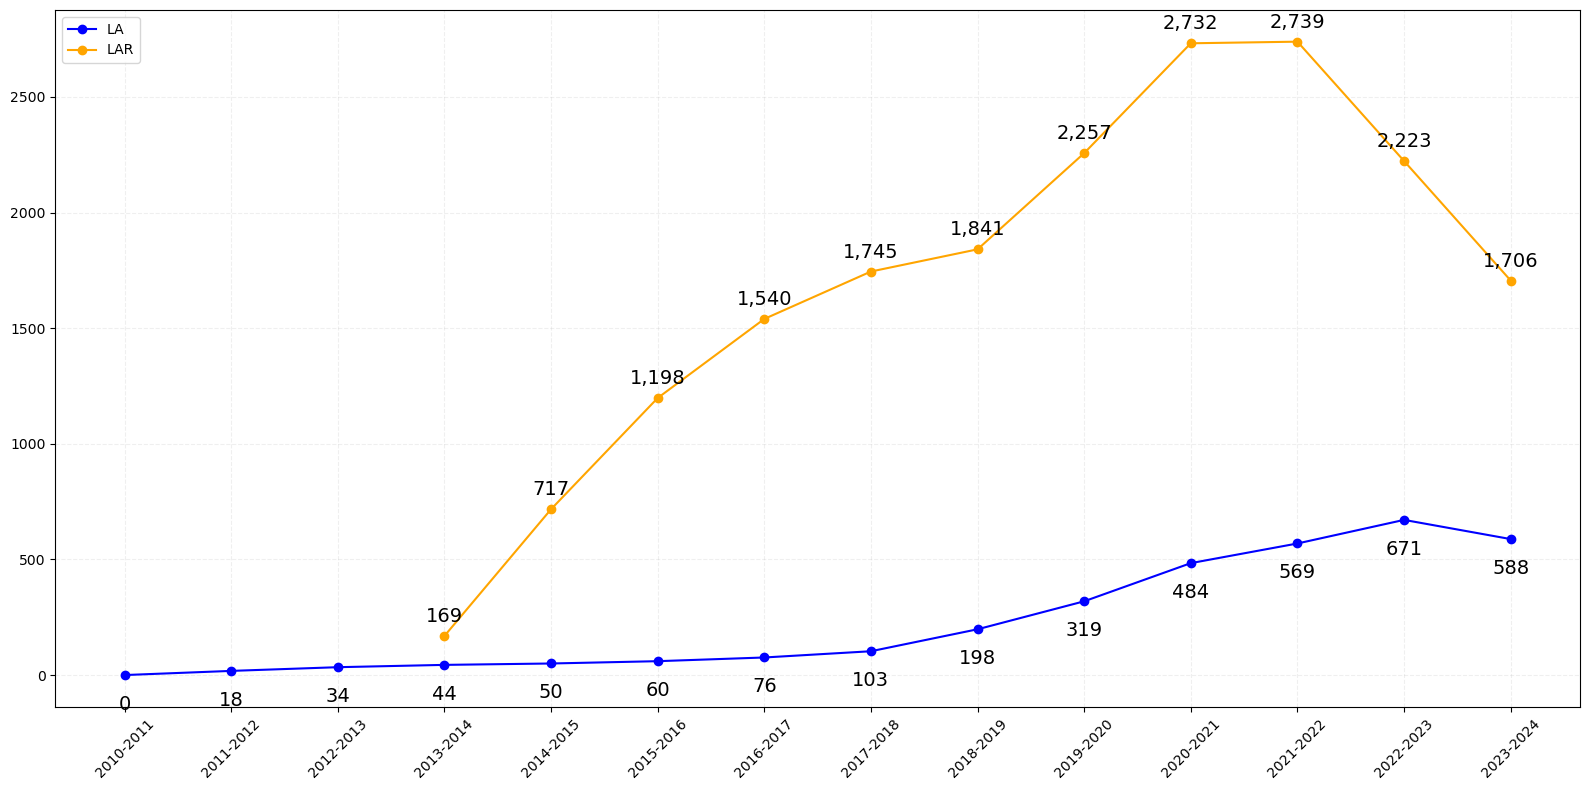

In [97]:
series = ["LA", "LAR"] # Séries concernées

# Filtrer et grouper les inscrits
inscrits_series = (
    df_filtre[df_filtre['SERIE_BACC'].isin(series)]
    .groupby(['ANNEE UNIVERSITAIRE', 'SERIE_BACC'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=series)
    .sort_index()
)

# Définir les années à annoter
every_n = max(1, len(inscrits_series) // 10)
year_label = inscrits_series.index[::every_n]

# === Création de la figure ===
plt.figure(figsize=(16, 8))

plt.plot(inscrits_series.index, inscrits_series['LA'], marker='o', label='LA', color='blue')
lar_mask = inscrits_series['LAR'] > 1
plt.plot(inscrits_series.index[lar_mask], inscrits_series['LAR'][lar_mask], marker='o', label='LAR', color='orange')

# Ajouter les étiquettes
for year in year_label:
    plt.text(year, inscrits_series.loc[year, 'LA'] - 150, f"{inscrits_series.loc[year, 'LA']:,}", ha='center', fontsize=14)
    if lar_mask.loc[year]:
        plt.text(year, inscrits_series.loc[year, 'LAR'] + 60, f"{inscrits_series.loc[year, 'LAR']:,}", ha='center', fontsize=14)
        
# plt.title("Évolution du nombre d'inscrits (LA et L-AR)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

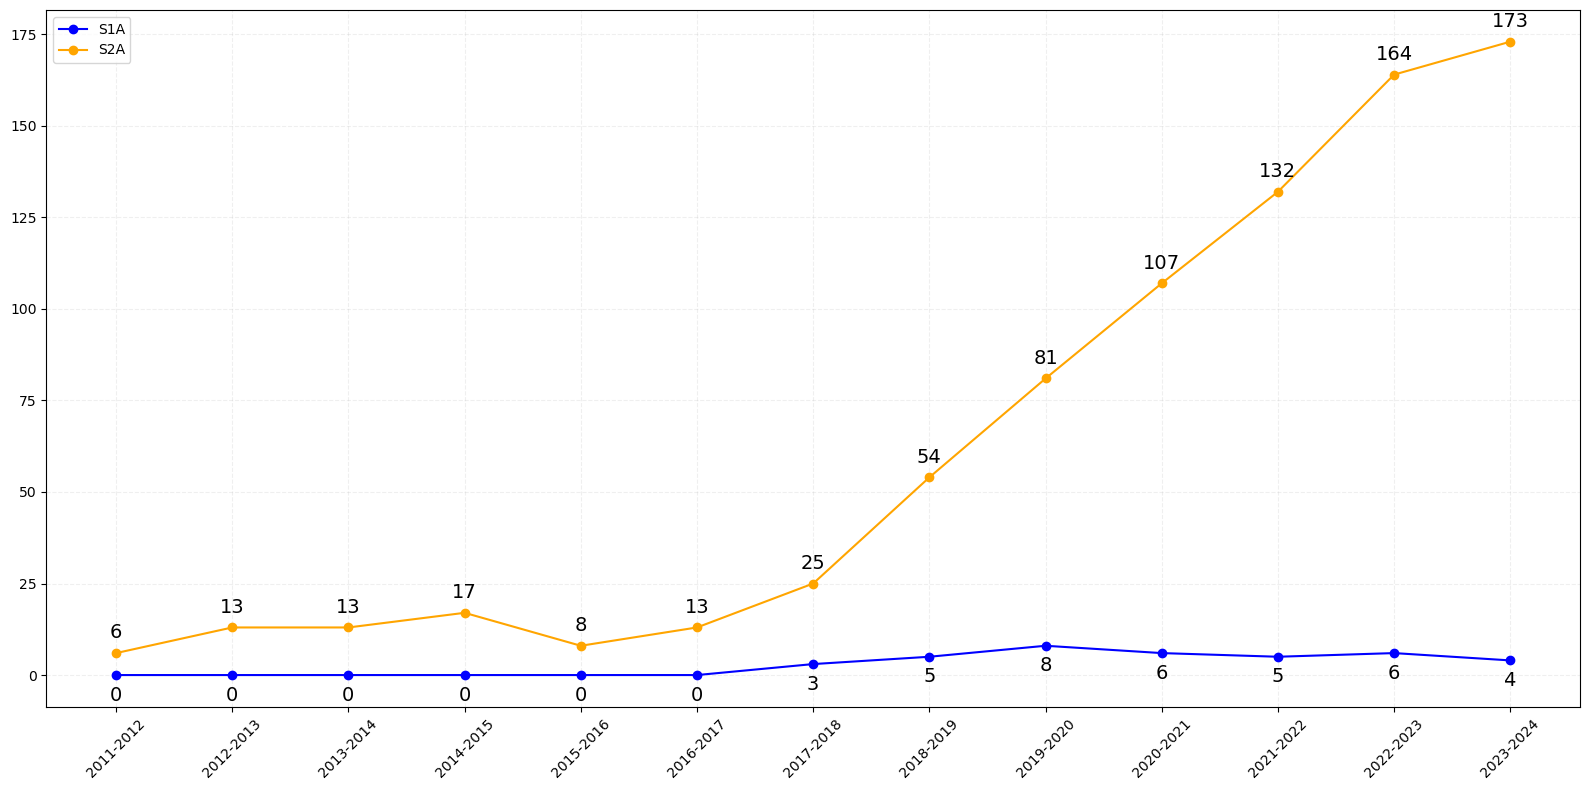

In [96]:
series = ["S1A", "S2A"] # Séries concernées

# Filtrer et grouper les inscrits
inscrits_series = (
    df_filtre[df_filtre['SERIE_BACC'].isin(series)]
    .groupby(['ANNEE UNIVERSITAIRE', 'SERIE_BACC'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=series)
    .sort_index()
)

# Définir les années à annoter
every_n = max(1, len(inscrits_series) // 10)
year_label = inscrits_series.index[::every_n]

# === Création de la figure ===
plt.figure(figsize=(16, 8))

plt.plot(inscrits_series.index, inscrits_series['S1A'], marker='o', label='S1A', color='blue')
lar_mask = inscrits_series['S2A'] >= 0
plt.plot(inscrits_series.index[lar_mask], inscrits_series['S2A'][lar_mask], marker='o', label='S2A', color='orange')

# Ajouter les étiquettes
for year in year_label:
    plt.text(year, inscrits_series.loc[year, 'S1A'] - 7, f"{inscrits_series.loc[year, 'S1A']:,}", ha='center', fontsize=14)
    if lar_mask.loc[year]:
        plt.text(year, inscrits_series.loc[year, 'S2A'] + 4 , f"{inscrits_series.loc[year, 'S2A']:,}", ha='center', fontsize=14)
        
# plt.title("Évolution du nombre d'inscrits (S1A et S2A)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

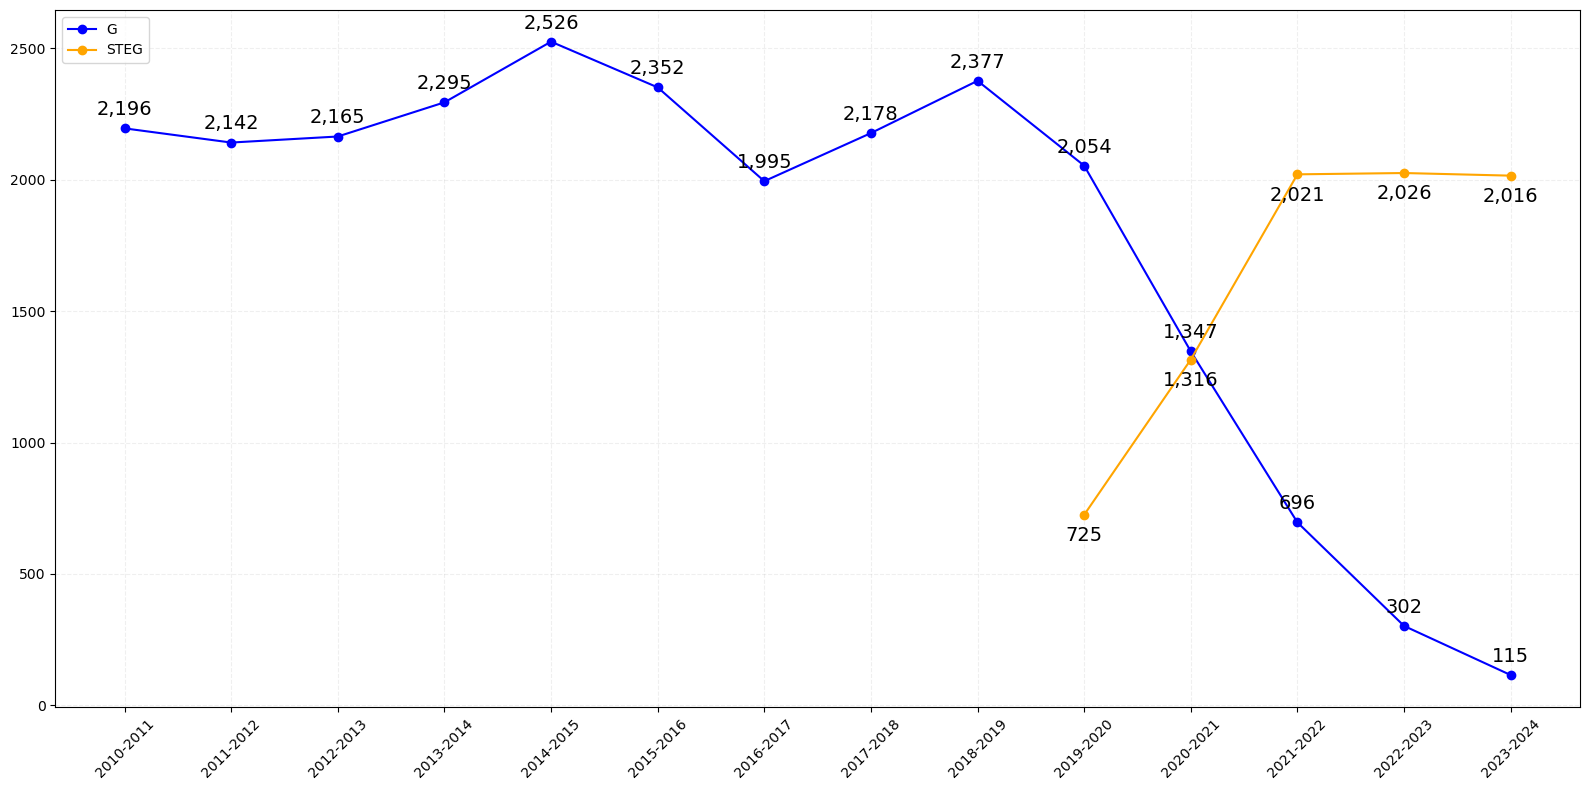

In [95]:
series = ["G", "STEG"] # Séries concernées

# Filtrer et grouper les inscrits
inscrits_series = (
    df_filtre[df_filtre['SERIE_BACC'].isin(series)]
    .groupby(['ANNEE UNIVERSITAIRE', 'SERIE_BACC'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=series)
    .sort_index()
)

# Définir les années à annoter
every_n = max(1, len(inscrits_series) // 10)
year_label = inscrits_series.index[::every_n]

# === Création de la figure ===
plt.figure(figsize=(16, 8))

plt.plot(inscrits_series.index, inscrits_series['G'], marker='o', label='G', color='blue')
lar_mask = inscrits_series['STEG'] > 1
plt.plot(inscrits_series.index[lar_mask], inscrits_series['STEG'][lar_mask], marker='o', label='STEG', color='orange')

# Ajouter les étiquettes
for year in year_label:
    plt.text(year, inscrits_series.loc[year, 'G'] + 50, f"{inscrits_series.loc[year, 'G']:,}", ha='center', fontsize=14)
    if lar_mask.loc[year]:
        plt.text(year, inscrits_series.loc[year, 'STEG'] - 100, f"{inscrits_series.loc[year, 'STEG']:,}", ha='center', fontsize=14)
        
# plt.title("Évolution du nombre d'inscrits (G et STEG)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [93]:
def plot_top_etabs(df_filtre, serie, annee_univ):
    """
    Affiche un histogramme des 5 établissements ayant le plus de recrues
    pour une série et une année universitaire données.
    """
    df_serie = df_filtre[df_filtre['SERIE_BACC'] == serie]
    top_etabs = df_serie[df_serie['ANNEE UNIVERSITAIRE'] == annee_univ]['ETABLISSMENT_CODE'].value_counts().nlargest(5)

    plt.figure(figsize=(16, 8))
    ax = sns.barplot(x=top_etabs.values, y=top_etabs.index, palette="viridis")
    plt.xlabel("Nombre d'inscrits", fontsize=16)
    plt.ylabel("Établissement", fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=12)
    plt.title(f"Top 5 établissements avec le plus d'inscrits ({serie}, {annee_univ})")

    for i, v in enumerate(top_etabs.values):
        ax.text(v + 2, i, str(v), color='black', va='center', fontsize=16)

    plt.tight_layout()
    plt.show()

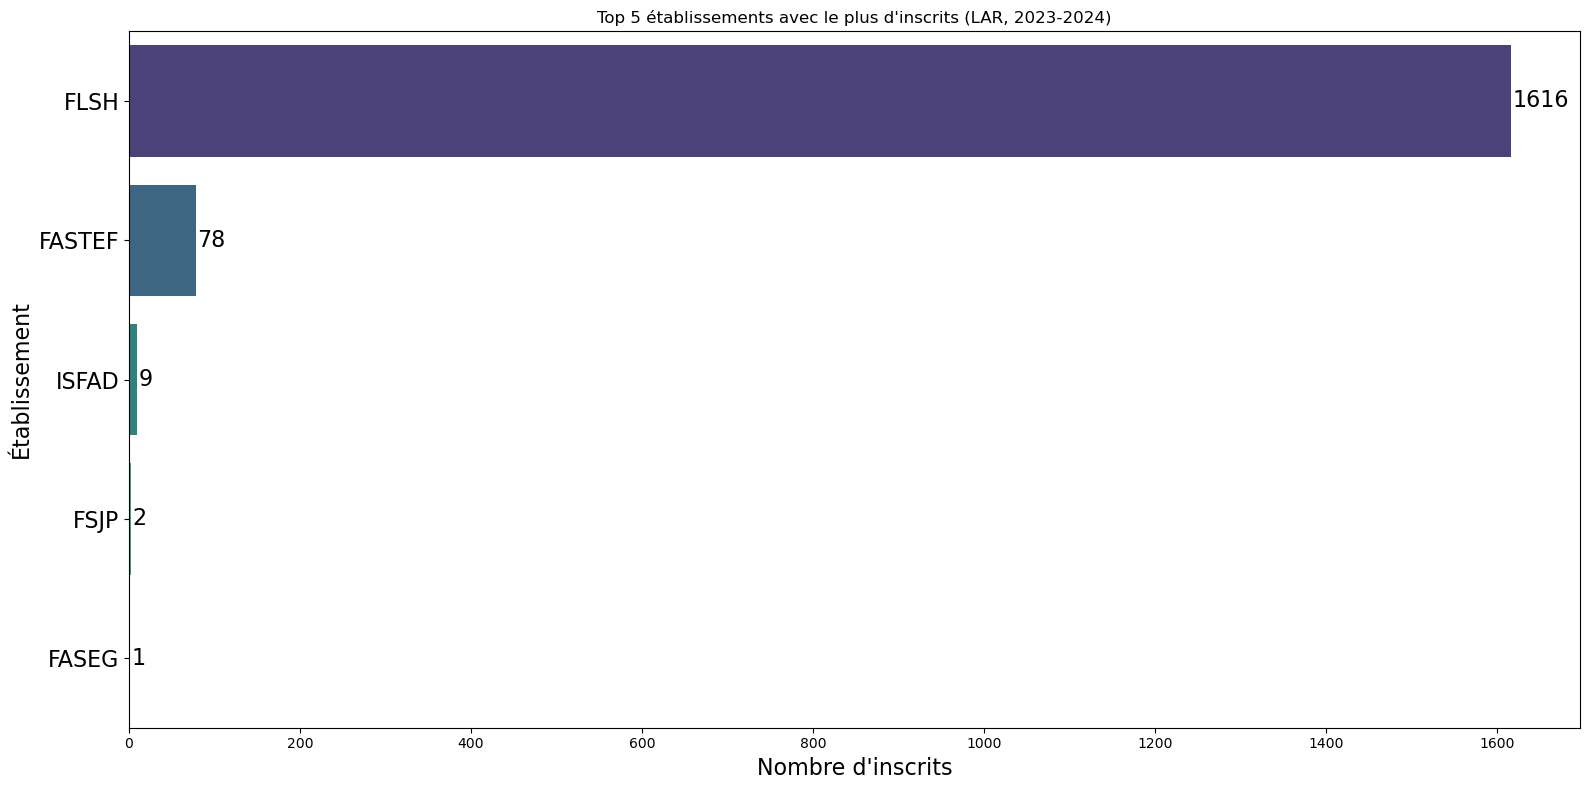

In [87]:
plot_top_etabs(df_filtre, 'LAR', '2023-2024')

In [90]:
def plot_top_departements(df_filtre, serie, annee_univ):
    """
    Affiche un histogramme des 5 départements ayant le plus de recrues
    pour une série et une année universitaire données.
    """
    df_serie = df_filtre[df_filtre['SERIE_BACC'] == serie]
    top_depts = df_serie[df_serie['ANNEE UNIVERSITAIRE'] == annee_univ]['DEPARTEMENT FORMATION'].value_counts().nlargest(5)

    plt.figure(figsize=(16, 8))
    ax = sns.barplot(x=top_depts.values, y=top_depts.index, palette="viridis")
    plt.xlabel("Nombre d'inscrits", fontsize=16)
    plt.ylabel("Département de formation", fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=12)
    plt.title(f"Top 5 départements avec le plus d'inscrits ({serie}, {annee_univ})")

    for i, v in enumerate(top_depts.values):
        ax.text(v + 2, i, str(v), color='black', va='center', fontsize=16)

    plt.tight_layout()
    plt.show()

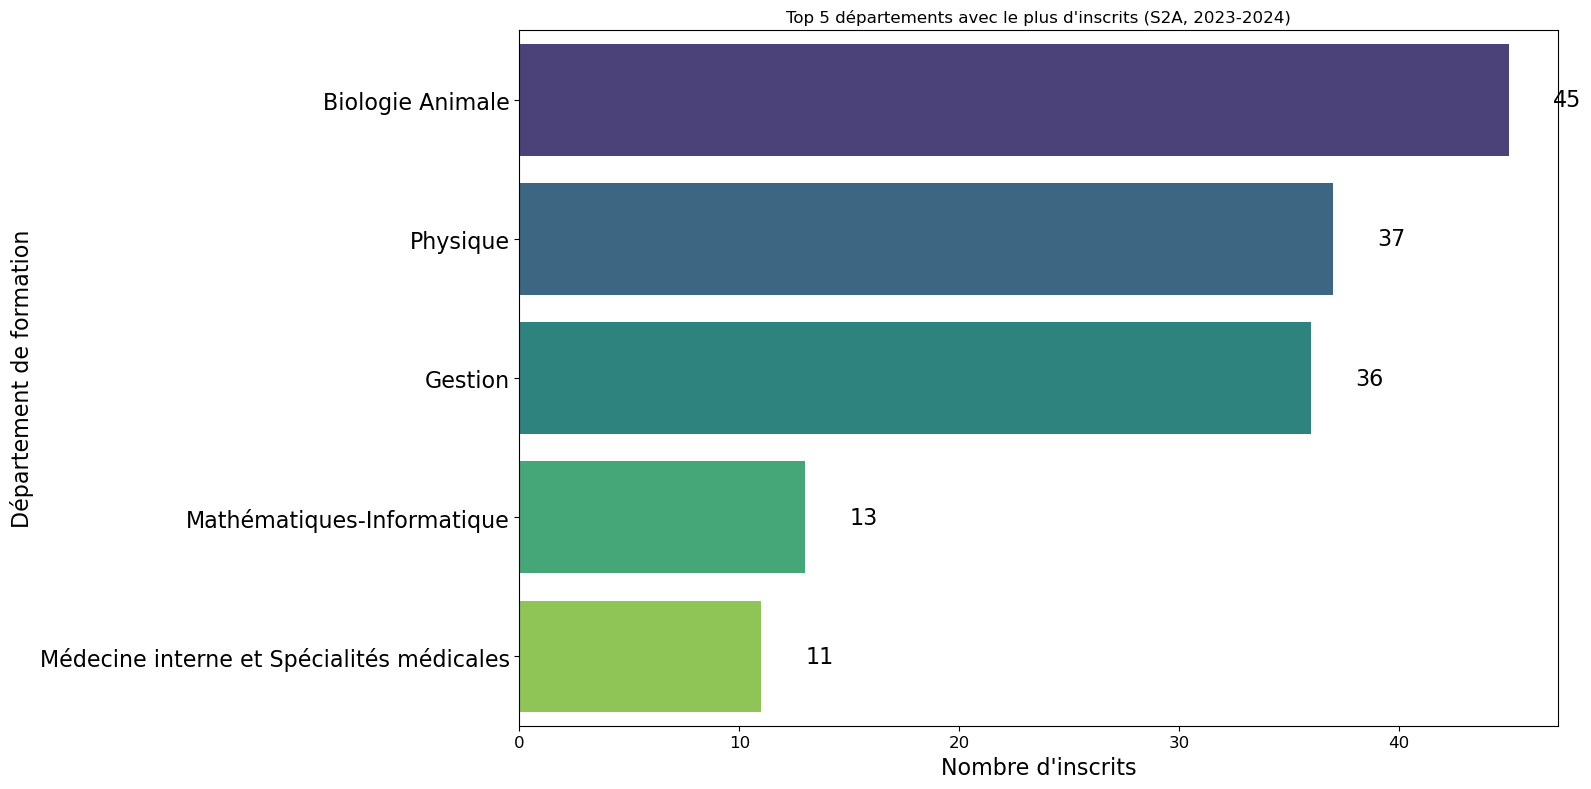

In [91]:
plot_top_departements(df_filtre, 'S2A', '2023-2024')

## Suivit de Cohort

In [ ]:
# Afficher les valeurs uniques présentes dans la colonne 'RESULTAT'
resultats_uniques = df_filtre['RESULTAT'].unique()
print("Valeurs possibles dans RESULTAT :")
print(resultats_uniques)

Valeurs possibles dans RESULTAT :
[nan 'A obtenu le diplôme' 'Passe' 'Redouble' 'Autorisé à passer'
 'Année validée' 'Année non validée' 'Exclu']


In [ ]:
def suivre_etudiants(df, annee_univ_depart, serie_bac, annee_bac):
    """
    Suivre l’évolution des étudiants à partir d'une cohorte initiale.

    Paramètres :
    - df : DataFrame contenant les données
    - annee_univ_depart : str, ex. '2018-2019'
    - serie_bac : str, ex. 'LA'
    - annee_bac : int, ex. 2018
    """
    # Étape 1 : extraire les NUMERO des étudiants de la cohorte de départ
    cohort = df[
        (df['SERIE_BACC'] == serie_bac) &
        (df['ANNEE_BACC'] == annee_bac) &
        (df['ANNEE UNIVERSITAIRE'] == annee_univ_depart)
    ]
    
    numeros = cohort['NUMERO'].unique()
    
    # Étape 2 : extraire toutes les inscriptions ultérieures (et celle de départ)
    historique = df[df['NUMERO'].isin(numeros)].copy()
    
    # Étape 3 : trier par NUMERO et année universitaire
    historique = historique.sort_values(by=['NUMERO', 'ANNEE UNIVERSITAIRE'])
    
    # Étape 4 : ne garder que les colonnes utiles
    colonnes = ['NUMERO', 'ANNEE_BACC', 'SERIE_BACC', 'ANNEE UNIVERSITAIRE', 'NIVEAU LMD ET NON LMD', 'RESULTAT']
    historique = historique[colonnes]
    
    return historique


#### Séries LA, cohort 2018-2019

In [ ]:
suivre_etudiants(df_filtre, '2018-2019', 'LA', 2018)

# Afficher les 20 premières lignes du résultat

,NUMERO,ANNEE_BACC,SERIE_BACC,ANNEE UNIVERSITAIRE,NIVEAU LMD ET NON LMD,RESULTAT
707435,201808IG5,2018.0,LA,2018-2019,L1,Redouble
710687,201808J65,2018.0,LA,2018-2019,L1,Redouble
723509,201808J66,2018.0,LA,2018-2019,L1,Redouble
689745,201808J67,2018.0,LA,2018-2019,L1,Passe
778155,201808J67,2018.0,LA,2019-2020,L2,Passe
...,...,...,...,...,...,...
762585,201808VDJ,2018.0,LA,2019-2020,L1,Passe
890193,201808VDJ,2018.0,LA,2020-2021,L2,Passe
965427,201808VDJ,2018.0,LA,2021-2022,L3,A obtenu le diplôme
692352,201808VGL,2018.0,LA,2018-2019,L1,Redouble


In [ ]:
def analyser_evolution(df, annee_univ_depart, serie_bac, annee_bac):
    suivi = suivre_etudiants(df, annee_univ_depart, serie_bac, annee_bac)
    
    # Création d'un tableau croisé dynamique
    resultats = suivi.pivot_table(
        index=['ANNEE UNIVERSITAIRE', 'NIVEAU LMD ET NON LMD'],
        columns='RESULTAT',
        values='NUMERO',
        aggfunc='nunique',
        fill_value=0
    ).reset_index()

    # Calcul du total d’inscrits
    resultats['INSCRITS'] = resultats[['Passe', 'Redouble', 'Exclu', 'Année non validée', 
                                       'Autorisé à passer', 'A obtenu le diplôme']].sum(axis=1)

    return resultats


In [ ]:
analyser_evolution(df_filtre, '2018-2019', 'LA', 2018)

RESULTAT,ANNEE UNIVERSITAIRE,NIVEAU LMD ET NON LMD,A obtenu le diplôme,Année non validée,Année validée,Autorisé à passer,Exclu,Passe,Redouble,INSCRITS
0,2018-2019,L1,0,0,0,14,0,38,81,133
1,2019-2020,L1,0,0,0,10,28,15,0,53
2,2019-2020,L2,0,8,5,6,0,25,20,59
3,2020-2021,1A,0,0,0,0,0,1,0,1
4,2020-2021,L2,0,8,7,11,5,10,15,49
5,2020-2021,L3,25,2,4,0,0,0,6,33
6,2021-2022,2A,0,0,0,0,0,1,0,1
7,2021-2022,L1,0,0,0,0,0,1,0,1
8,2021-2022,L2,0,1,0,0,4,2,0,7
9,2021-2022,L3,7,8,5,0,4,0,16,35
